<a href="https://colab.research.google.com/github/financieras/pyCourse/blob/main/ejemplos/caso3_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto 1
## VAN y TIR
* VAN = NPV
* TIR = IRR

In [5]:
!pip install numpy-financial     # instalamos la librería financiera
!pip install tabulate            # instalamos la librería que permite hacer tablas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy_financial as npf   # importamos la librería financiera

cash_flows = [-600_000, 100_000, 150_000, 200_000, 250_000, 300_000]
discount_rate = 0.1

van = npf.npv(discount_rate, cash_flows)
print(f"Net Present Value ({discount_rate:.2%}) = {van:,.2f} €")

Net Present Value (10.00%) = 122,168.75 €


In [7]:
tir = npf.irr(cash_flows)
print(f"Internal rate of return: {tir:.2%}")

Internal rate of return: 16.40%


In [8]:
initialInvestment = cash_flows[0]       # guardamos en una variable el desembolso inicial
cash_flows[0] = 0                       # en la lista de cash flows hacemos cero el desembolso inicial
van = initialInvestment + npf.npv(discount_rate, cash_flows)
print(van)                              # obtenemos el van esperado, ahora sin formato

122168.75399718084


### Programando el VAN
* Valor Actual Neto
* $A$ = Desembolso inicial
* $Q_t$ = Flujos de caja desde $t=1$ hasta $t=n$
* $k$ = tasa de descuento

$$ \mathrm{VAN} = -A + \sum_{t=1}^n{\frac{Q_t}{(1+k)^t}} $$

In [9]:
def van(tasa, flujos):
    total = 0
    for i, flujo in enumerate(flujos):
        total += flujo / (1 + tasa)**(i)
    return total

tasa = 0.1
flujos = [-600_000, 100_000, 150_000, 200_000, 250_000, 300_000]
print(f"VAN = {van(tasa, flujos):,.2f} €")

VAN = 122,168.75 €


# Reto 2
## Función Pago (pmt)
* npf.pmt(rate, nper, pv, fv, when = ‘end’)
* fv es optativo, por defecto es 0
* when es optativo, por defecto es 'end', pagos a final de periodo, pospagable
* Calcular el pago mensual periódico necesario para amortizar un préstamo de 350.000 €, a 20 años, al 6% TIN (Tipo de Interés Nominal)
* con Excel: =PAGO(6%/12;20*12;-350000)

In [10]:
import numpy_financial as npf

pago = npf.pmt(0.06/12, 20 * 12, 350_000)

# Here fv = 0 ; Also Default value of fv = 0
print(f"Pago mensual: {-pago:,.2f} €" )

Pago mensual: 2,507.51 €


## Cuadro de amortización de un préstamo
Préstamo francés de 100.000 euros, a devolver en 10 años, al 5% anual.

In [11]:
import numpy_financial as npf
import numpy as np
import tabulate as tab
import matplotlib.pyplot as plt

# en primer lugar vamos a calcular la cuota constante

C0 = 100000
n = 10 
tasa = 0.05

pago = npf.pmt(rate=tasa, nper=n, pv=-C0, fv=0, when='end')
print(pago)

12950.457496545661


In [12]:
#Vamos a calcular el capital pendiente de cada periodo

pendiente = npf.fv(rate=tasa, nper =range(n+1), pmt = pago, pv= -C0)
print(pendiente)

[100000.          92049.54250345  83701.56213208  74936.18274214
  65732.5343827   56068.70360529  45921.68128901  35267.30785691
  24080.21575321  12333.76904433     -0.        ]


In [13]:
#Calculamos la amortización de cada año

amortz = npf.ppmt(rate=tasa, per=range(n+1), nper=n, pv=-C0, fv=0, when='end')
print(amortz)

[ 7571.86428242  7950.45749655  8347.98037137  8765.37938994
  9203.64835944  9663.83077741 10147.02231628 10654.3734321
 11187.0921037  11746.44670888 12333.76904433]


In [14]:
#Calculamos los intereses de cada periodo

interes = npf.ipmt(rate=tasa, per=range(n+1), nper=n, pv=-C0, fv=0)
print(interes)

[5378.59321412 5000.         4602.47712517 4185.0781066  3746.80913711
 3286.62671914 2803.43518026 2296.08406445 1763.36539285 1204.01078766
  616.68845222]


In [15]:
#Comprobamos

comprob = np.array(amortz + interes)
print(comprob)

[12950.45749655 12950.45749655 12950.45749655 12950.45749655
 12950.45749655 12950.45749655 12950.45749655 12950.45749655
 12950.45749655 12950.45749655 12950.45749655]


In [16]:
#Hacemos un cuadro de amortización para ver los datos con la librería tabulate
datos =[]
saldo = C0
saldo2 = 0
linea1 = [0,0,0,0,C0,0]
datos.append(linea1)

Anualidad = npf.pmt(rate=tasa, nper=n, pv=-C0, fv=0, when='end')

for i in range(1, n+1):
    pago_capital = npf.ppmt(rate=tasa, per=i, nper=n, pv=-C0, fv=0, when='end')
    pago_int = Anualidad - pago_capital
    saldo -= pago_capital
    saldo2 += pago_capital
    
    linea = [i, format(Anualidad, '.0f'),  format(pago_int, '.0f'), format(pago_capital, '.0f'), format(saldo, '.0f'), format(saldo2, '.0f')]
    
    datos.append(linea)
    
print(tab.tabulate(datos, headers= ['Periodo', 'Anualidad', 'Intereses', 'Amortización','Capital Vivo','Capital Amortizado'], tablefmt = 'psql'))

+-----------+-------------+-------------+----------------+----------------+----------------------+
|   Periodo |   Anualidad |   Intereses |   Amortización |   Capital Vivo |   Capital Amortizado |
|-----------+-------------+-------------+----------------+----------------+----------------------|
|         0 |           0 |           0 |              0 |         100000 |                    0 |
|         1 |       12950 |        5000 |           7950 |          92050 |                 7950 |
|         2 |       12950 |        4602 |           8348 |          83702 |                16298 |
|         3 |       12950 |        4185 |           8765 |          74936 |                25064 |
|         4 |       12950 |        3747 |           9204 |          65733 |                34267 |
|         5 |       12950 |        3287 |           9664 |          56069 |                43931 |
|         6 |       12950 |        2803 |          10147 |          45922 |                54078 |
|         

[]

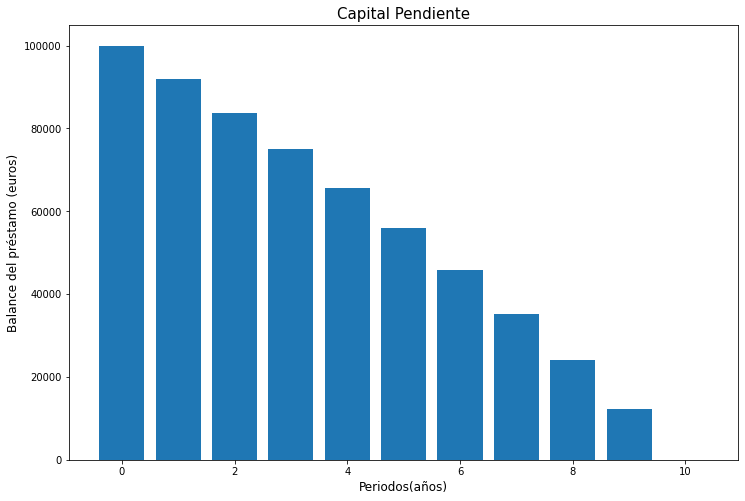

In [17]:
#Comprobemos como evoluciona nuestro prestamo en la siguiente gráfica

plt.figure(figsize = (12, 8))
plt.bar(range(0, n + 1), pendiente)
plt.title("Capital Pendiente", fontsize = 15)
plt.xlabel("Periodos(años)", fontsize = 12)
plt.ylabel("Balance del préstamo (euros)", fontsize = 12)
plt.plot()

[]

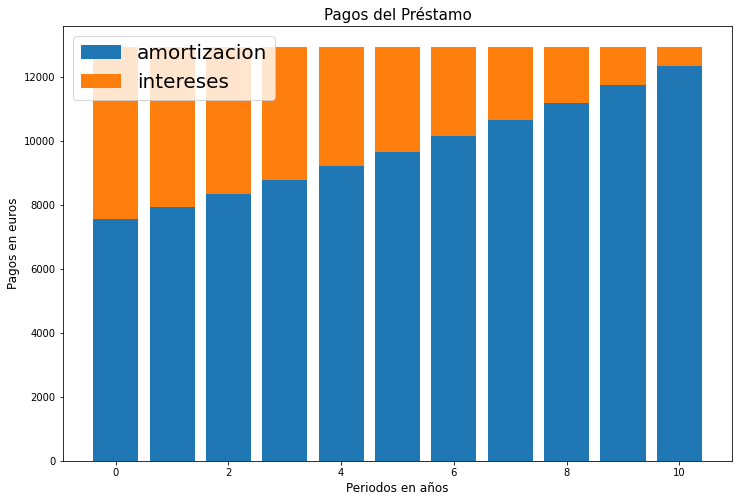

In [18]:
plt.figure(figsize = (12, 8))
plt.bar(range(0, n + 1), amortz, label = 'amortizacion')
plt.bar(range(0, n + 1), interes, bottom= amortz, label='intereses')
plt.legend(fontsize = 20)
plt.title("Pagos del Préstamo", fontsize = 15)
plt.xlabel("Periodos en años", fontsize = 12)
plt.ylabel("Pagos en euros", fontsize = 12)
plt.plot()

# Reto 3
## Calcular el precio de un bono
Puede consultar el archivo de Excel: [excel_para_pyhton.xlsm](https://www.dropbox.com/s/wzq2y2k97c1d6rg/excel_para_pyhton.xlsm?dl=1)

## Precio utilizando la TIR
Puede ver la **Hoja1** del documento de Excel.


Supongamos un bono con las siguientes características:
* Nominal 1.000 €
* Cupón anual 10%
* Madura al quinto año
* TIR: r = 8%

Se pide:
* Calcular el precio del bono
* Una vez conocido el precio del bono, comprobar que la TIR coincide con el dato proporcionado



In [ ]:
pip install numpy-financial

In [ ]:
import numpy_financial as npf

# DATOS DEL BONO
nominal = 1000
cupon = 0.1
n = 5  # años
r = 0.08

# FLUJOS DE CAJA
flujos = [0]
for i in range(1, n+1):
    if i < n:
        flujos.append(cupon * nominal)
    elif i == n:
        flujos.append(cupon * nominal + nominal)
print("Flujos de caja: ", flujos)

# PRECIO DEL BONO
precio = 0
for i in range(1, n+1):
    precio += flujos[i] / (1+r)**i
print("Precio del bono:", precio)
bono = flujos[:]
bono[0] = -precio

# COMPROBACIÓN TIR = r
tir = npf.irr(bono)
print(f"La TIR del bono es: {tir:.5%}")  # Internal rate of return

## Precio utilizando la ETTI
Puede ver la **Hoja2** del documento de Excel.


Supongamos un bono con las siguientes características:
* Nominal 1.000 €
* Cupón anual 10%
* Madura al quinto año
* La ETTI para los diferentes años es:
 - año 1: 2%
 - año 2: 4%
 - año 3: 6%
 - año 4: 8%
 - año 5: 10%

Se pide:
* Calcular el precio del bono
* Calcular la TIR

In [ ]:
import numpy_financial as npf

# DATOS
nominal = 1000
cupon = 0.1
n = 5 # años
r01 = 0.02
r02 = 0.04
r03 = 0.06
r04 = 0.08
r05 = 0.10
etti = [r01,r02,r03,r04,r05]

# FLUJOS DE CAJA
flujos = [0]
for i in range(1, n+1):
    if i < n:
        flujos.append(cupon * nominal)
    elif i == n:
        flujos.append(cupon * nominal + nominal)
print("Flujos de caja: ", flujos)

# PRECIO DEL BONO CON LA ETTI
precio = 0
for i in range(1, n+1):
    precio += flujos[i] / (1+etti[i-1])**i
print("Precio del bono:", precio)
bono = flujos[:]
bono[0] = -precio

# CALCULAR LA TIR DEL BONO TIR = r
tir = npf.irr(bono)
print(f"La TIR del bono es: {tir:.6%}")  # Internal rate of return

# Reto 4
## Creación de un bono sintético cupón cero
Puede ver la **Hoja3** del documento de Excel.


Supongamos dos bonos A y B, ambos a 5 años con las siguientes características:
* Bono A
 - Nominal: 10.000 €
 - Cupón anual: 2%
* Bono B
 - Nominal: 4.000 €
 - Cupón anual: 25%
* La ETTI para los diferentes años es:
 - año 1: 2%
 - año 2: 4%
 - año 3: 6%
 - año 4: 8%
 - año 5: 10%

Se pide:
* Calcular el precio de ambos bonos
* Calcular la TIR de ambos bonos
* Crear el bono C que es un bono sintético que se forma combinando los bonos A y B para conseguir un bono cupón cero a 5 años.
* Calcular la TIR del bono C y comprobar que es igual a la ETTI a 5 años, que es del 10%.

In [ ]:
import numpy_financial as npf

# DATOS BONO A
nominalA = 10_000
cuponA = 0.02
n = 5 # años, para A y B
# DATOS BONO B
nominalB = 4_000
cuponB = 0.25
# ETTI
etti =[.02,.04,.06,.08,.10]

# FLUJOS DE CAJA DE LOS BONOS
def flujos(nominal, cupon, n):
    cf = [0]  # array con el cash flow
    for i in range(1, n+1):
        if i < n:
            cf.append(cupon * nominal)
        elif i == n:
            cf.append(cupon * nominal + nominal)
    return cf

# Flujos de caja de los Bonos A y B
flujosA = flujos(nominalA, cuponA, n)
flujosB = flujos(nominalB, cuponB, n)

# PRECIO DE UN BONO CON LA ETTI
def precio_etti(flujos, etti):
    precio = 0
    for i in range(1, n+1):
        precio += flujos[i] * (1+etti[i-1])**-i
    return precio

# Precios de los Bonos A y B
precioA = precio_etti(flujosA, etti)
precioB = precio_etti(flujosB, etti)
print(f"El precio del bono A es {precioA}")
print(f"El precio del bono B es {precioB}")
# Flujos de caja de los bonos A y B
bonoA = flujosA[:]
bonoA[0] = -precioA
bonoB = flujosB[:]
bonoB[0] = -precioB

# CREACIÓN DEL BONO SINTÉTICO C

# m es el número de bonos que se han de comprar o vender de uno de los bonos
m = max(cuponA*nominalA, cuponB*nominalB) / min(cuponB*nominalB, cuponA*nominalA)
# con los datos de ejemplo m = 1000 / 200 = 5

# Flujos de caja del bono C
bonoC = [0]*(n+1)
for i in range(0, n+1):
    bonoC[i] = m * bonoA[i] - bonoB[i]
print(f"Flujos de caja del bono C: {bonoC}")

# Calcular la TIR de los bonos
tirA = npf.irr(bonoA)
tirB = npf.irr(bonoB)
tirC = npf.irr(bonoC)
print(f"La TIR del bono A es: {tirA:.6%}")
print(f"La TIR del bono B es: {tirB:.6%}")
print(f"La TIR del bono C es: {tirC:.6%}")

# Reto 5
## Reinversión de flujos de caja intermedios
Puede ver la **Hoja4** del documento de Excel.


La importancia de trabajar con bonos cupón cero.

La TIR es la Tasa Interna de Rentabilidad, la palabra 'Interna' indica que si la operación financiera analizada se mezcla con otras operaciones la rentabilidad prometida por la TIR se podría alterar.

Una operación de inversión que tenga flujos de caja intermedios, por ejemplo un bono cupón explícito, puede no proporcionar a su propietario la rentabilidad que promete la TIR del bono si el inversor no se preocupa de reinvertir los flujos de caja intermedios hasta el final de la operación.

Supongamos un bono cupón explícito con las siguientes características:
* Nominal 10.000 €
* Cupón 10%
* Madura a los 10 años
* Precio de adquisición 10.000 €

Se pide:
* Calcular la TIR del bono
* Calcular la rentabilidad del inversor supueto que reinvierta los flujos de caja intermedios hasta el momento de vencimiento, a las siguientes rentabilidades:
 - al 0%
 - al 10%
 - al 20%
* Crear un bono cupón cero, al mismo plazo, por el mismo precio, cuyo último flujo de caja sea el necesario para proporcionar una rentabilidad del 10% y comprobar que su TIR es de 10%.

In [ ]:
import numpy_financial as npf

# DATOS
nominal = 10_000
cupon = .1
n = 10 # años
precio = 10_000

# Flujos de caja del bono
cf = [0]*(n+1)
for i in range(1,n+1):
    cf[i] = cupon * nominal
cf[n] += nominal
cf[0] = -precio

print(f"La TIR del bono es: {npf.irr(cf):.2%}")

# Montante de la Reinversión
def montante(cf,r):
    m = 0 # montante
    for i in range(1, n+1):
        m += cf[i]*(1+r)**(n-i)
    return m

tasas_reinversion = [0,.1,.2]
for t in tasas_reinversion:
    m = montante(cf,t)
    print()
    print(f"El montante reinvirtiendo al tanto del {t:.0%} es {m:,.2f} €")
    print(f"La rentabilidad del inversor reinvirtiendo al tanto {t:.0%} es {(m/precio)**(1/n)-1:.2%}")

La TIR del bono es: 10.00%

El montante reinvirtiendo al tanto del 0% es 20,000.00 €
La rentabilidad del inversor reinvirtiendo al tanto 0% es 7.18%

El montante reinvirtiendo al tanto del 10% es 25,937.42 €
La rentabilidad del inversor reinvirtiendo al tanto 10% es 10.00%

El montante reinvirtiendo al tanto del 20% es 35,958.68 €
La rentabilidad del inversor reinvirtiendo al tanto 20% es 13.65%


# Reto 6
## Comparación entre una inversión cierta y otra aleatoria
Puede ver la **Hoja5** del documento de Excel.


Comparemos dos inversiones A y B, ambas de duración 1 año y que proporcionan ambas un 10% anual, con una inversión de un millón de euros cada una. La inversión A es cierta, esto supone que existe un 100% de probabilidad de que el flujo de caja final sea 1.100.000 €. La inversión B, tiene una probabilidad del 1% de que el montante final sea m1, y una probabilidad del 99% de que el montante final sea m2.  
Se pide:  
* Caso 1: si m1 = 0, calcular m2, para que la rentabilidad esperada de la inversión B sea del 10%
* Caso 2: si m1 = 500.000, calcular m2, para que la rentabildidad esperada de B sea el 10%
* Comprobar que la TIR de ambas inversiones es del 10%

In [ ]:
import numpy_financial as npf

# DATOS
c = 1_000_000 # capital inicial
r = .1 # rentabilidad 10% anual
ma = c*(1+r) # Montante A: el montante de la inversión A es 1.100.000
p = .01 # probabilidad de que suceda una de las ramas de la inverión B
q = 1-p # probabilidad complementaria de la otra rama de B, se cumple que p+q=1

# Cálculo de mb2
# El montante de la inversión B es mb y tiene dos componentes mb1 + mb2 = mb
def mb_2(ma,p,mb1):
    return (ma - p * mb1) / q

# Resultados
print("CASO 1")
mb1 = 500_000 # primer caso que nos piden
mb2 = mb_2(ma,p,mb1)
print(f"Si el montante alcanzado con mb1 es {mb1:,} entonces el montante mb2 es {mb2:,.2f}")
print(f"La TIR de la inversión B1 es: {npf.irr([-c,mb1]):.1%}")
print(f"La TIR de la inversión B2 es: {npf.irr([-c,mb2]):.2%}")
print(f"La TIR de la inversión A es: {npf.irr([-c, ma]):.1%}")          # comprobar que ambas TIR son del 10%
print(f"La TIR de la inversión B es: {npf.irr([-c, p*mb1+q*mb2]):.1%}") # comprobar que ambas TIR son del 10%
print()

print("CASO 2")
mb1 = 0       # segundo caso que nos piden
mb2 = mb_2(ma,p,mb1)
print(f"Si el montante alcanzado con mb1 es {mb1} entonces el montante mb2 es {mb2:,.2f}")
print(f"La TIR de la inversión B1 es: {npf.irr([-c,mb1]):.1%}")
print(f"La TIR de la inversión B2 es: {npf.irr([-c,mb2]):.2%}")
print(f"La TIR de la inversión A es: {npf.irr([-c, ma]):.1%}")          # comprobar que ambas TIR son del 10%
print(f"La TIR de la inversión B es: {npf.irr([-c, p*mb1+q*mb2]):.1%}") # comprobar que ambas TIR son del 10%

CASO 1
Si el montante alcanzado con mb1 es 500,000 entonces el montante mb2 es 1,106,060.61
La TIR de la inversión B1 es: -50.0%
La TIR de la inversión B2 es: 10.61%
La TIR de la inversión A es: 10.0%
La TIR de la inversión B es: 10.0%

CASO 2
Si el montante alcanzado con mb1 es 0 entonces el montante mb2 es 1,111,111.11
La TIR de la inversión B1 es: nan%
La TIR de la inversión B2 es: 11.11%
La TIR de la inversión A es: 10.0%
La TIR de la inversión B es: 10.0%


# Reto 7
## Forward $r_{12}$ conocidos dos bonos
Puede ver la **Hoja6** del documento de Excel.


En el mercado cotizan los bonos A y B.
* El bono A es un bono cupón cero de duración un año y TIR del 10%
* El bono B es un bono cupón explícito de 4.400 € anuales,  nominal 10.000 €, duración 2 años y precio de 14.000 €
* El bono C es un bono cupón cero a dos años, que se obtiene como bono sintético combinando los bonos A y B

Se pide:
* Calcular la TIR del bono C
* Comprobar que la TIR del bono C es el punto de la ETTI a dos años ($r_{02}$). Para hacer la comprobación calcular con la ETTI los precios de los bonos A, B y C y comprobar que coinciden con los previstos.
* Comprobar que el nominal elegido para el bono A puede ser cualquiera, es arbitrario.

In [ ]:
import numpy_financial as npf
from random import randint, seed
seed()

# DATOS
tirA = .1
cuponB = 4_400
nominalB = 10_000
precioB = 14_000
nominalA = randint(1,10000)
print(f"El nominal elegido para el bono A es {nominalA}")

# FLUJOS DE CAJA bonos A y B
bonoB = [-precioB, cuponB, cuponB+nominalB]
bonoA = [-nominalA/(1+tirA), nominalA, 0]    # añadimos un flujo 0 en t=2 por comodidad, para luego restar flujos
m = bonoB[1]/bonoA[1]
print(f"El multiplicador m es {m}")
bonoC = [bonoB[0]-m*bonoA[0], bonoB[1]-m*bonoA[1], bonoB[2]-m*bonoA[2]]
print("Bono C: ", bonoC)

# TIR del bono C
tirC = npf.irr(bonoC)
print(f"La TIR del bono C es: {tirC:.6%}")

# Creación de la ETTI
etti = [tirA, tirC] # la tirC si pertenece a la ETTI por ser un bono cupón cero, pero la tirB no pertenece

# COMPROBAR PRECIOS CON LA ETTI
def precio_etti(flujos, etti):
    precio = 0
    for i in range(1, len(flujos)):
        precio += flujos[i] * (1+etti[i-1])**-i
    return precio

# Precios de los Bonos A, B y C
precioA = precio_etti(bonoA, etti)
precioB = precio_etti(bonoB, etti)
precioC = precio_etti(bonoC, etti)
print(f"La diferencia de precios en el bono A es {precioA+bonoA[0]}")
print(f"La diferencia de precios en el bono B es {precioB+bonoB[0]}")
print(f"La diferencia de precios en el bono C es {precioC+bonoC[0]}")

El nominal elegido para el bono A es 4860
El multiplicador m es 0.9053497942386831
Bono C:  [-10000.0, 0.0, 14400.0]
La TIR del bono C es: 20.000000%
La diferencia de precios en el bono A es 0.0
La diferencia de precios en el bono B es -3.637978807091713e-12
La diferencia de precios en el bono C es -3.637978807091713e-12


# Reto 8
## Calcular la ETTI con una cartera de tres bonos
Puede ver la **Hoja7** del documento de Excel.

### FASE 1
En el mercado cotizan los bonos A , B y C.
* El bono A es un bono cupón cero a un año de nominal 1.000 € y TIR del 10%
* El bono B es un bono cupón explícito de 90 € anuales,  nominal 1.000 € y duración 2 años
* El bono C es un bono cupón explícito de 500 € anuales, nominal 1.000 € y duración 3 años
* Conocemos la ETTI a 1, 2 y 3 años que es 10%, 20% y 30%, respectivamente  

Se pide:
* Calcular los precios de los bonos A, B y C
* Calcular la TIR de los bonos A, B y C

### FASE 2
Supongamos conocidos los flujos de caja de los bonos A, B y C incluidos sus precios.  

Se pide:
* Calcular la ETTI de los años 1, 2 y 3.

In [ ]:
import numpy_financial as npf

#####   FASE 1   #####
# Flujos de caja de los bonos
bonoA = [0,1000,0,0]     # inicialmente el flujo de caja inicial es cero
bonoB = [0,90,1090,0]
bonoC = [0,500,500,1500]

# Calcular el precio de los bonos dada la ETTI
etti = [.1, .2, .3]
def precio_etti(flujos, etti):
    precio = 0
    for i in range(1, len(flujos)):
        precio += flujos[i] * (1+etti[i-1])**-i
    return precio

precioA = precio_etti(bonoA, etti)
precioB = precio_etti(bonoB, etti)
precioC = precio_etti(bonoC, etti)
print(f"El precio del bono A es {precioA:,.2f} €")
print(f"El precio del bono B es {precioB:,.2f} €")
print(f"El precio del bono C es {precioC:,.2f} €")
print()

# Calcular la TIR de los bonos
bonoA[0] = -precioA
bonoB[0] = -precioB
bonoC[0] = -precioC

tirA = npf.irr(bonoA)
tirB = npf.irr(bonoB)
tirC = npf.irr(bonoC)

print(f"La TIR del bono A es: {tirA:.2%}")
print(f"La TIR del bono B es: {tirB:.2%}")
print(f"La TIR del bono C es: {tirC:.2%}")
print()

#####   FASE 2   #####
etti_calculada = [0,0,0]  # inicializamos el array
etti_calculada[0] = tirA  # la ETTI del año 1 es la TIR del bono A por ser un bono cupón cero a un año
def calcula_etti(bono, etti_calculada):
    n = [i for i, e in enumerate(bono) if e != 0][-1]
    ultimo_flujo = bono[n]
    precio = -bono[0]
    fcid = 0 # inicializamos los flujos de caja intermedios descontados
    for t in range(1,n): # recorre los flujos de caja intermedios
        fcid += bono[t] / (1+etti[t-1])**t
    return (ultimo_flujo / (precio - fcid))**(1/n)-1

r02 = calcula_etti(bonoB, etti_calculada) # calculamos r02 conocido el bono B y r01
etti_calculada[1] = r02

r03 = calcula_etti(bonoC, etti_calculada) # calculamos r03 conocido el bono C, r01 y r02
etti_calculada[2] = r03

# Imprime la etti_calculada
for i in range(len(etti_calculada)):
    print(f"La ETTI del año {i+1} es {etti_calculada[i]:.2%}")

El precio del bono A es 909.09 €
El precio del bono B es 838.76 €
El precio del bono C es 1,484.52 €

La TIR del bono A es: 10.00%
La TIR del bono B es: 19.49%
La TIR del bono C es: 25.13%

La ETTI del año 1 es 10.00%
La ETTI del año 2 es 20.00%
La ETTI del año 3 es 30.00%


In [ ]:
# Para calcular n
bonoA = [0,1000,0,0]          # n = 1, vector = [1]
bonoB = [0,90,1090,0]         # n = 2, vector = [1, 2]
bonoC = [0,500,500,1500]      # n = 3, vector = [1, 2, 3]
bono = bonoA
vector = [i for i, e in enumerate(bono) if e != 0]  # list comprhension
print(vector[-1])

1


# Reto 9
## Arbitraje
Puede consultar el archivo de Excel: [arbitraje_con_bonos.xlsx](https://www.dropbox.com/s/vom9tvkf0upfl4b/arbitraje_con_bonos.xlsx?dl=1)


## Ejemplo sencillo
Puede ver la **Hoja1** del documento de Excel.

Supongamos dos fruterías donde venden el mismo tipo de manzana.
* Tienda A: precio 100 céntimos/Kg
* Tienda B: precio 160 céntimos/Kg

Operamos bajo el supuesto de que en cada tienda podemos comprar o vender las manzanas.

Estrategia de arbitraje:
* Compramos las manzanas en la tiena A, donde el precio es más barato
* Vendemos las manzanas en la tienda B, donde el precio es más caro

La estrategia consiste en comprar el activo infravalorado y vender el activo sobrevalorado.

De esta forma estaríamos ganando la diferencia.

## Introduciendo intereses
Supongamos que el caso anterior de compraventa no se produce simultáneamente en el tiempo y que necesitamos financiar nuestra compra durante un tiempo.
* Duración de la operación: 1 año
* Tipo de interés: 10% anual
* En t=0 pedimos un prestamo de 100 para comprar en la tienda A
* En t=0 compramos las manzanas en la tienda A por 100
* En t=1 vendemos las manzanas en la tienda B por 160
* En t=1 devolvemos el préstamo 100*(1+0.1) = 110
* Beneficio obtenido:
 - Método 1: 160-100-10 = 50 en t=1
 - Método 2: 100-100+160-110 = 50 en t=1


In [ ]:
precioA = 100
precioB = 160
n = 1          # duración en años
Co = precioA   # Capital inicial prestado
r = .1         # tipo de interés anual
Cn = Co*(1+r)**n
flujos_caja = [Co-precioA, round(precioB-Cn,8)]
print(f"Los flujos de caja de la operación en los diferentes años son: {flujos_caja}")

Los flujos de caja de la operación en los diferentes años son: [0, 50.0]


## Arbitraje en el mercado de bonos
Puede ver la **Hoja2** del documento de Excel.

Disponemos de dos bonos que maduran a dos años, ambos de cupón explícito y con diferente duración de Macaulay (*duration*).
* El bono A tiene un cupón anual de 10 € y nominal de 1.000 €.
* El bono B tiene un cupón anual de 200 € y nominal de 1.000 €.
* Conocemos la ETTI a un año (5%) y a dos años (20%).
* Supongamos que en el mercado los inversores compran el bono A que es el de mayor TIR y desprecian el bono B. La presión de las compras hace que el precio del bono A suba, haciendo que su TIR baje hasta llegar a coincidir con la del bono B.

Se pide:  
* Calcular el precio de los bonos A y B
* Calcular la TIR de los bonos A y B
* Calcular la *duratin* de ambos bonos
* Ante este mercado desequilibrado:
 - calcular el nuevo precio que tendrá el bono A
 - establecer la estrategia de arbitraje que permitiría obtener ventaja
 - determinar el beneficio obtenido por el arbitraje y en que instante se produciría.


In [ ]:
pip install numpy-financial

In [ ]:
import numpy_financial as npf
import numpy as np             # la librería numpy nos permitirá trabajar con ndarrays

# DATOS
bonoA = [0, 10, 1010]
bonoB = [0, 200, 1200]
etti = [.05, .2]

# PRECIO DE UN BONO CON LA ETTI
def precio_etti(flujos, etti):
    precio = 0
    for i in range(1, len(bonoA)):
        precio += flujos[i] * (1+etti[i-1])**-i
    return precio

# Precios de los Bonos A y B
precioA = precio_etti(bonoA, etti)
precioB = precio_etti(bonoB, etti)
print(f"El precio del bono A es {precioA}")
print(f"El precio del bono B es {precioB}")
# Flujos de caja de los bonos A y B
bonoA[0] = -precioA
bonoB[0] = -precioB

# Calcular la TIR de los bonos
tirA = npf.irr(bonoA)
tirB = npf.irr(bonoB)
print(f"La TIR del bono A es: {tirA:.4%}")
print(f"La TIR del bono B es: {tirB:.4%}")

# Calcular la duración de Macaulay
def duracion(bono):
    tir =npf.irr(bono)
    precio = 0
    numerador = 0
    for i in range(1, len(bonoA)):
        precio += bono[i] * (1+tir)**-i
        numerador += i * bono[i] * (1+tir)**-i
    return numerador / precio

print(f"La duration del bono A es {duracion(bonoA)}")
print(f"La duration del bono B es {duracion(bonoB)}")

# Nuevo precio del bono A en el mercado desequilibrado
precioAprima = npf.npv(tirB, bonoA) + precioA # sumamos el antiguo precio de A ya que va en la posición [0] del array con signo negativo
print(f"El nuevo precio del bono A en el mercado desequilibrado es {precioAprima}")
bonoAprima =[-precioAprima, bonoA[1], bonoA[2]]

# Bono C = B - 20A'
# bonoC = bonoB - 20 * bonoAprima  # esto da error, necesitamos trabajar con ndarrays
bonoB_arr = np.array(bonoB)
bonoAprima_arr =np.array(bonoAprima)
bonoC_arr = bonoB_arr - 20 * bonoAprima_arr
print(f"El bono C es {bonoC_arr}")

# Ajustamos con un préstamo
prestamo = np.array([bonoC_arr[2] / (1+etti[1])**2, 0, -bonoC_arr[2]])
print(f"El préstamo es {prestamo}")

# Cartera Total
total = bonoC_arr + prestamo
print(f"Cartera resultante del arbitraje {total}")

El precio del bono A es 710.9126984126985
El precio del bono B es 1023.809523809524
La TIR del bono A es: 19.8989%
La TIR del bono B es: 18.4704%
La duration del bono A es 1.988268094271526
La duration del bono B es 1.8351074725250018
El nuevo precio del bono A en el mercado desequilibrado es 728.0583383461574
El bono C es [ 13537.35724311      0.         -19000.        ]
El préstamo es [-13194.44444444      0.          19000.        ]
Cartera resultante del arbitraje [342.91279867   0.           0.        ]


# Reto 10
## Forward implícito
* Puede consultar el blog [masterfinanciero.es](https://www.masterfinanciero.es/2010/10/forward-implicito.html)
* Puede descargar el archivo de Excel [forward_implicito_01.xlsx](https://www.dropbox.com/s/7vbyj1cb9hxfqv9/forward_implicito_01.xlsx?dl=1)

En el mercado están disponibles los siguientes bonos:
* Bono A: Letra del Tesoro de duración un año y precio de adquisición 933 €
* Bono B: Bono cupón explícito del 7% y duración 2 años que se adquiere con un descuento del 2% sobre el nominal.

Se pide:
* Determinar el tipo de interés forward implícito para el periodo que se inicia en t=1 y finaliza en t=2 años, $r_{12}$.
* Calcular $r_{02}$
* Calcular nuevamente $r_{12}$ utilizando para ello el valor de $r_{02}$ anteriormente calculado
* Comprobar que el forward $r_{12}$ coincide por ambos métodos

$$ (1+r_{02})^2 = (1+r_{01}) (1+r_{12}) $$

In [ ]:
import numpy_financial as npf
import numpy as np

##############       MÉTODO 1       ##############

# DATOS   
bonoA = np.array([-933, 1000, 0])
bonoB = np.array([-98, 7, 107])  # ver los flujos de caja del archivo Excel

# Bono C
bonoC = np.array([0,0,0])        # inicializamos el ndarray
bonoC = bonoA[0]*bonoB - bonoB[0]*bonoA
print(f"Bono C: {bonoC}")

# Forward r12
r12 = npf.irr(bonoC)
print(f"MÉTODO 1: el forward r12 es {r12:.4%}")

##############       MÉTODO 2       ##############

# Bono D
bonoD = np.array([0,0,0])        # inicializamos el ndarray
bonoD = bonoA[1]*bonoB - bonoB[1]*bonoA
print(f"Bono D: {bonoD}")

# ETTI a dos años r02
r02 = npf.irr(bonoD)
print(f"La ETTI a dos años es r02 = {r02:.4%}")

# TIR del Bono A (r01)
r01 = npf.irr(bonoA)
print(f"La TIR del bono A es r01 = {r01:.4%}")

##############      COMPROBACIÓN      ##############

# Comprobación r12 = r12_bis
r12_bis = (1+r02)**2 / (1+r01) -1
print(f"MÉTODO 2: el forward r12 es {r12_bis:.4%}")
print(f"La diferencia de r12 por ambos métodos es {abs(r12 - r12_bis)}")

Bono C: [     0  91469 -99831]
MÉTODO 1: el forward r12 es 9.1419%
Bono D: [-91469      0 107000]
La ETTI a dos años es r02 = 8.1571%
La TIR del bono A es r01 = 7.1811%
MÉTODO 2: el forward r12 es 9.1419%
La diferencia de r12 por ambos métodos es 0.0


## Cálculo de un tipo Forward $r_{23}$
* Puede consultar el blog [Cálculo de un tipo Forward utilizando Solver](https://www.masterfinanciero.es/2010/10/calculo-de-un-tipo-forward-utilizando.html)
* Puede descargar el archivo de Excel [forward_con_solver_01.xlsx](https://www.dropbox.com/s/6d9z41mimz5nyh0/forward_con_solver_01.xlsx?dl=1)

En un mercado de renta fija cotizan los siguienes bonos:
* Bono A: es un bono cupón cero a un año que se adquiere por 100 y se amortiza por 110
* Bono B: es un bono cupón cero a dos años con TIR del 9% y precio de adquisición de 500 €
* Bono C: es un bono cupón cero a tres años con TIR del 8% y nominal de 1.000 €  

Se pide:
* Calcular el tipo de interés forward implícito en el mercado: r23

In [ ]:
import numpy_financial as npf
import numpy as np

# DATOS   
bonoA = np.array([-100, 110, 0, 0])
bonoB = np.array([-500, 0, 500*1.09**2, 0])  # la TIR del bono B es del 9%
bonoC = np.array([-1000/1.08**3, 0, 0, 1000])

print(f"Bono A: {bonoA}")
print(f"Bono B: {bonoB}")
print(f"Bono C: {bonoC}")

##############       MÉTODO 1       ##############

bonoD = np.ndarray([0,0,0,0])
bonoD = -bonoC[0] * bonoB + bonoB[0] * bonoC
print(f"Bono D: {bonoD}")
tirD = npf.irr(bonoD)
print(f"Método 1: el forward r23 es {tirD:.5%}")

##############       MÉTODO 2       ##############
r23 = (1+0.08)**3 / (1+0.09)**2 -1
print(f"Método 2: el forward r23 es {r23:.5%}")

Bono A: [-100  110    0    0]
Bono B: [-500.      0.    594.05    0.  ]
Bono C: [-793.83224102    0.            0.         1000.        ]
Bono D: [      0.               0.          471576.04277803 -500000.        ]
Método 1: el forward r23 es 6.02744%
Método 2: el forward r23 es 6.02744%
